# Explore RGI Data
Author: Ann Windnagel

Date: 02/22/2019

This notebook is a scratch space to explore the RGI data. It opens up RGI data files, explores the dataframes, and plots some data. See https://www.glims.org/RGI/ for information about RGI and to download the data.

### Import Packages

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import sys

import earthpy as et

# set working dir
os.chdir(os.path.join(et.io.HOME, "git/wgms-glacier-project"))

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import scripts.wgms_scripts as ws

### Explore Region 1 - Alaska

In [2]:
# Open RGI region 01 - Alaska
rgi_region01_polygons = ws.open_rgi_region(1)

01_rgi60_Alaska/01_rgi60_Alaska.shp


In [3]:
rgi_region01_polygons.head()

,RGIId,GLIMSId,BgnDate,EndDate,CenLon,CenLat,O1Region,O2Region,Area,Zmin,...,Aspect,Lmax,Status,Connect,Form,TermType,Surging,Linkages,Name,geometry
0,RGI60-01.00001,G213177E63689N,20090703,-9999999,-146.823,63.689,1,2,0.360,1936,...,346,839,0,0,0,0,9,9,None,"POLYGON ((-146.818039438 63.69080602500003, -1..."
1,RGI60-01.00002,G213332E63404N,20090703,-9999999,-146.668,63.404,1,2,0.558,1713,...,162,1197,0,0,0,0,9,9,None,"POLYGON ((-146.663536816 63.40763849900003, -1..."
2,RGI60-01.00003,G213920E63376N,20090703,-9999999,-146.080,63.376,1,2,1.685,1609,...,175,2106,0,0,0,0,9,9,None,"POLYGON ((-146.072316956 63.38347508900006, -1..."
3,RGI60-01.00004,G213880E63381N,20090703,-9999999,-146.120,63.381,1,2,3.681,1273,...,195,4175,0,0,0,0,9,9,None,"POLYGON ((-146.14895309 63.37918822200004, -14..."
4,RGI60-01.00005,G212943E63551N,20090703,-9999999,-147.057,63.551,1,2,2.573,1494,...,181,2981,0,0,0,0,9,9,None,"POLYGON ((-147.043066865 63.55024013500008, -1..."


In [4]:
# Check CRS
print(rgi_region01_polygons.crs)

{'init': 'epsg:4326'}


In [5]:
# Explore column headings
print("Number of columns:")
print(len(rgi_region01_polygons.columns))
print("Column names:")
print(list(rgi_region01_polygons))

Number of columns:
23
Column names:
['RGIId', 'GLIMSId', 'BgnDate', 'EndDate', 'CenLon', 'CenLat', 'O1Region', 'O2Region', 'Area', 'Zmin', 'Zmax', 'Zmed', 'Slope', 'Aspect', 'Lmax', 'Status', 'Connect', 'Form', 'TermType', 'Surging', 'Linkages', 'Name', 'geometry']


### Description of RGI columns from https://www.glims.org/RGI/00_rgi60_TechnicalNote.pdf

1. RGIId: The RGI glacier identifier is a 14-character identifier of the form RGIvv-rr.nnnnn, where vv is the version number, rr is the firstorder region number and nnnnn is an arbitrary identifying code that is unique within the region. 
1. GLIMSId: Corresponding GLIMS glacier ID
1. BgnDate, EndDate: The date of the source from which the outline was taken, in the form yyyymmdd, with missing dates represented by -9999999.  When a single date is known, it is assigned to BgnDate. If only a year is given, mmdd is set to 9999. Only when the source provides a range of dates is EndDate not missing, and in this case the two codes together give the date range.
1. CenLon, CenLat: Longitude and latitude, in degrees, of a single point representing the location of the glacier. These coordinates agree with those in GLIMSId.
1. O1Region, O2Region: The codes of the first-order and second-order regions (Table 2 of 00_rgi60_TechnicalNote.pdf) to which the glacier belongs.
1. Area: Area of the glacier in km2, calculated in cartesian coordinates on a cylindrical equal-area projection of the authalic sphere of the WGS84 ellipsoid, or, for nominal glaciers, accepted from the source inventory.
1. Zmin, Zmax: Minimum and maximum elevation (m above sea level) of the glacier, obtained in most cases directly from a DEM covering the glacier. For most of the nominal glaciers Zmin and Zmax were taken from the parent inventory, WGI or WGI-XF.
1. Zmed: Median elevation (m) of the glacier, chosen by sorting the elevations of the DEM cells covering the glacier and recording the 50th percentile of their cumulative frequency distribution.
1. Slope: Mean slope of the glacier surface (deg), obtained by averaging single-cell slopes from the DEM.
1. Aspect: The aspect (orientation) of the glacier surface (deg) is presented as an integer azimuth relative to 0° at due north. The aspect sines and cosines of each of the glacier’s DEM grid cells are summed and the mean aspect is calculated as the arctangent of the quotient of the two sums.
1. Lmax: Length (m) of the longest surface flowline of the glacier. The length is measured with the algorithm of Machguth and Huss (2014). 
1. Status: The Status attribute flags glaciers whose outlines await subdivision or are nominal circles:
  * 0 Glacier or ice cap
  * 1 Glacier complex
  * 2 Nominal glacier
  * 9 Not assigned
1. Connect: The Connect attribute records the connectivity level developed by Rastner et al. (2012) for glaciers in Greenland. Glaciers that are physically detached from the ice sheet have a connectivity level of 0.
1. Form: The Form attribute contains information on the form of the ice body:
  * 0 Glacier
  * 1 Ice cap
  * 2 Perennial snowfield
  * 3 Seasonal snowfield
  * 9 Not assigned
1. TermType: The TermType attribute contains information on terminus type. Lake-terminating glaciers are identified as such only in Alaska, the Southern Andes and Antarctica; elsewhere they currently have TermType equal to 0. Where more than one value applies to a given terminus, the dominant type as interpreted from satellite imagery is chosen.
  * 0 Land-terminating
  * 1 Marine-terminating
  * 2 Lake-terminating
  * 3 Dry calving
  * 4 Regenerated
  * 5 Shelf-terminating
  * 9 Not assigned
1. Surging: The Surging attribute contains information on evidence for surging, and is based on the inventory of Sevestre and Benn (2015).
  * 0 No evidence
  * 1 Possible
  * 2 Probable
  * 3 Observed
  * 9 Not assigned
1. Linkages: The Linkages attribute indicates whether the ancillary file 00_RGI60_LINKS.CSV contains a link to mass-balance measurements in the Fluctuations of Glaciers database. To date 232 linkages have been identified.
  * 0 Not in FG
  * 1 In FG
  * 9 Not assigned
1. Name: Name of the glacier, or the WGI or WGI-XF id code (modified after Müller et al., 1978) if available. 

In [6]:
# number of rows x columns
rgi_region01_polygons.shape

(27108, 23)

In [7]:
# List the size of the biggest glacier by area for region 01 in the RGI database
rgi_region01_polygons['Area'].max()

3362.656

In [8]:
# Full row of biggest glacier by area in region 01
rgi_region01_polygons.loc[rgi_region01_polygons['Area'].idxmax()]

RGIId                                          RGI60-01.13696
GLIMSId                                        G219572E60177N
BgnDate                                              20100912
EndDate                                              -9999999
CenLon                                               -140.428
CenLat                                                 60.177
O1Region                                                    1
O2Region                                                    5
Area                                                  3362.66
Zmin                                                        6
Zmax                                                     5943
Zmed                                                     1510
Slope                                                      10
Aspect                                                    172
Lmax                                                   136989
Status                                                      0
Connect 

In [9]:
# This line finds Muir glacier specifically
muir_glacier = rgi_region01_polygons.loc[rgi_region01_polygons['Name']=='Muir Glacier']
muir_glacier

,RGIId,GLIMSId,BgnDate,EndDate,CenLon,CenLat,O1Region,O2Region,Area,Zmin,...,Aspect,Lmax,Status,Connect,Form,TermType,Surging,Linkages,Name,geometry
20836,RGI60-01.20841,G223525E59221N,20100915,-9999999,-136.475,59.221,1,6,80.284,85,...,135,25654,0,0,0,0,9,9,Muir Glacier,"POLYGON ((-136.49452898 59.27395042200004, -13..."


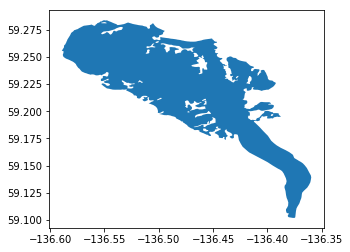

In [10]:
# plot muir glacier
muir_glacier.plot()

In [11]:
muir_glacier.crs

{'init': 'epsg:4326'}

In [12]:
# print area from database
print("area from database (km2):", muir_glacier['Area'])
# calcluate area
print(muir_glacier['geometry'].area/10**6)
print(muir_glacier['geometry'].to_crs({'init': 'epsg:32633'}).area/10**6)
print(muir_glacier['geometry'].to_crs({'init': 'epsg:3395'}).area/10**6)
print(muir_glacier['geometry'].to_crs({'init': 'epsg:3338'}).area/10**6)
print(muir_glacier['geometry'].to_crs({'init': 'esri:102006'}).area/10**6)

area from database (km2): 20836    80.284
Name: Area, dtype: float64
20836    1.262026e-08
dtype: float64
20836    85.32107
dtype: float64
20836    305.078399
dtype: float64
20836    80.284269
dtype: float64
20836    80.284269
dtype: float64


### Explore Region 11 - Central Europe

In [13]:
# Open RGI region 11 - central europe
#rgi_region11_file_path = "data/rgi/raw/11_rgi60_CentralEurope/11_rgi60_CentralEurope.shp"
rgi_region11_polygons = ws.open_rgi_region(11)

11_rgi60_CentralEurope/11_rgi60_CentralEurope.shp


In [14]:
rgi_region11_polygons.head()

,RGIId,GLIMSId,BgnDate,EndDate,CenLon,CenLat,O1Region,O2Region,Area,Zmin,...,Aspect,Lmax,Status,Connect,Form,TermType,Surging,Linkages,Name,geometry
0,RGI60-11.00001,G013599E47495N,20030799,20030999,13.5987,47.4949,11,1,0.122,2191,...,334,461,0,0,0,0,9,9,None,"POLYGON ((13.60035015400007 47.49330088800008,..."
1,RGI60-11.00002,G013614E47485N,20030799,20030999,13.6135,47.4845,11,1,2.292,2203,...,49,1853,0,0,0,0,9,9,None,"POLYGON ((13.60638417200005 47.47577712600003,..."
2,RGI60-11.00003,G013596E47484N,20030799,20030999,13.5960,47.4835,11,1,0.851,2280,...,314,1140,0,0,0,0,9,9,None,"POLYGON ((13.59765307300006 47.47612829400003,..."
3,RGI60-11.00004,G013583E47481N,20030799,20030999,13.5829,47.4807,11,1,0.053,2319,...,306,382,0,0,0,0,9,9,None,"POLYGON ((13.58282961100002 47.47969313200008,..."
4,RGI60-11.00005,G013603E47477N,20030799,20030999,13.6026,47.4774,11,1,0.057,2656,...,291,202,0,0,0,0,9,9,None,"POLYGON ((13.60075742500004 47.47519346500007,..."


In [15]:
# Check CRS
print(rgi_region11_polygons.crs)

{'init': 'epsg:4326'}


In [16]:
# Explore column headings
print("Number of columns:")
print(len(rgi_region11_polygons.columns))
print("Column names:")
print(list(rgi_region11_polygons))

Number of columns:
23
Column names:
['RGIId', 'GLIMSId', 'BgnDate', 'EndDate', 'CenLon', 'CenLat', 'O1Region', 'O2Region', 'Area', 'Zmin', 'Zmax', 'Zmed', 'Slope', 'Aspect', 'Lmax', 'Status', 'Connect', 'Form', 'TermType', 'Surging', 'Linkages', 'Name', 'geometry']


In [17]:
# number of rows x columns
rgi_region11_polygons.shape

(3927, 23)

In [18]:
# List the size of the biggest glacier by area for region 11 in the RGI database
rgi_region11_polygons['Area'].max()

82.206

In [19]:
# Full row of biggest glacier by area for region 11
rgi_region11_polygons.loc[rgi_region11_polygons['Area'].idxmax()]

RGIId                                          RGI60-11.01450
GLIMSId                                        G008019E46503N
BgnDate                                              20030799
EndDate                                              20030999
CenLon                                                8.01919
CenLat                                                46.5028
O1Region                                                   11
O2Region                                                    1
Area                                                   82.206
Zmin                                                     1607
Zmax                                                     4077
Zmed                                                     3162
Slope                                                    14.7
Aspect                                                    149
Lmax                                                    23746
Status                                                      0
Connect 

In [20]:
# find Aletsch glacier
ans = rgi_region11_polygons.loc[(rgi_region11_polygons['Name'] >= 'Gq') & (rgi_region11_polygons['Name'] < 'Gs')]
ans.Name

1875          Gries
3165    Grand Etret
Name: Name, dtype: object

In [21]:
# find it by glims id G008032E46504N
# why can't i find Aletsch glacier in central europe?
ans2 = rgi_region11_polygons.loc[rgi_region11_polygons['GLIMSId']=='G008032E46504N']
ans2

,RGIId,GLIMSId,BgnDate,EndDate,CenLon,CenLat,O1Region,O2Region,Area,Zmin,...,Aspect,Lmax,Status,Connect,Form,TermType,Surging,Linkages,Name,geometry


In [22]:
# This line finds Aletsch glacier specifically
aletsch_glacier = rgi_region11_polygons.loc[rgi_region11_polygons['Name']=='Aletsch Glacier']
aletsch_glacier

,RGIId,GLIMSId,BgnDate,EndDate,CenLon,CenLat,O1Region,O2Region,Area,Zmin,...,Aspect,Lmax,Status,Connect,Form,TermType,Surging,Linkages,Name,geometry
